<a href="https://colab.research.google.com/github/lucasvazcastro/Projeto_Aplicado_II/blob/main/Projeto_Aplicado2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Identificação

#@markdown Turma
Turma = '2024.2 - 03A - Ciência de Dados' #@param {type:"string"}
#@markdown Integrantes do Grupo
Aluno1 = 'Clayton dos Santos Lira - RA 10416054' #@param {type:"string"}
Aluno2 = 'Lorena Vaz Cord - RA 10424700' #@param {type:"string"}
Aluno3 = 'Tiago Clemente Rodrigues - RA 10423746' #@param {type:"string"}
Aluno4 = 'Lucas Vaz de Castro Oliveira - RA 10424623' #@param {type:"string"}

# Análise de Sentimento em Comentários de E-commerce Usando Processamento de Linguagem Natural e Aprendizado de Máquina

In [24]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.2 MB/s eta 0:00:00


In [34]:
#importação das bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#importação da base das bases de dados de relevância

reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')

In [3]:
reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


# Análise exploratória dos dados

In [4]:
reviews.shape

(99224, 7)

In [5]:
reviews[['review_score', 'review_comment_title', 'review_comment_message']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_score            99224 non-null  int64 
 1   review_comment_title    11568 non-null  object
 2   review_comment_message  40977 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


O dataframe referente a comentários dos pedidos possui um total de 99224 linhas e 7 colunas. Além disso, os atributos que apresentam relevância para o presente estudo são **review_score**, **review_comment_title**	e **review_comment_message**. Desses atributos, o **review_score** não apresenta nenhum valor nulo, com 99224 registros, enquanto **review_comment_message** possui 40977 registros (58247 nulos) e **review_comment_title** figura com o menor número de registros (1156 válidos e 87656 nulos).

In [8]:
# Quantidade de valores nulos para os atributos de interesse

reviews[['review_score', 'review_comment_title', 'review_comment_message']].isnull().sum()

,0
review_score,0
review_comment_title,87656
review_comment_message,58247


Assim sendo, o atributo **review_comment_message** possui uma cobertura maior e com mais informações detalhadas que **review_comment_title**, sendo uma boa fonte de dados para a análise proposta. Contudo, entendemos que o atributo **review_comment_title**, mesmo que contenha menos dados,  oferece informações importantes de forma mais concisa e representativa do sentimento expresso pelo cliente. Nesse sentido, o título tende a refletir o sentimento mais proeminente e imediato (positivo, negativo ou neutro), como podemos observar abaixo:

In [7]:
reviews['review_comment_title'].dropna().head(10)

,review_comment_title
9,recomendo
15,Super recomendo
19,Não chegou meu produto
22,Ótimo
34,Muito bom.
36,Bom
38,Maravilhoso!
43,Entrega perfeita
53,Ótimo
59,MT lindo


Por isso, optou-se pela combinação do título, quando disponível, com o conteúdo do comentário, de forma a enriquecer a análise, na forma do novo atributo nomeado **combined_text**.

In [9]:
reviews['combined_text'] = reviews['review_comment_title'].fillna('') + ' ' + reviews['review_comment_message']


In [12]:
reviews['combined_text'].info()

<class 'pandas.core.series.Series'>
Index: 40977 entries, 3 to 99223
Series name: combined_text
Non-Null Count  Dtype 
--------------  ----- 
40977 non-null  object
dtypes: object(1)
memory usage: 640.3+ KB


In [11]:
# removendo os valores ausentes no texto combinado

reviews.dropna(subset=['combined_text'], inplace=True)

Outro aspecto relevante diz respeito à distribuição das notas presentes no atributo **review_score**. A tabela e gráfico abaixo mostram como essas avalições estão distribuídas (após remoção de valores ausentes).

In [14]:
reviews['review_score'].value_counts().sort_index()

,count
review_score,
1,8745
2,2145
3,3557
4,5976
5,20554


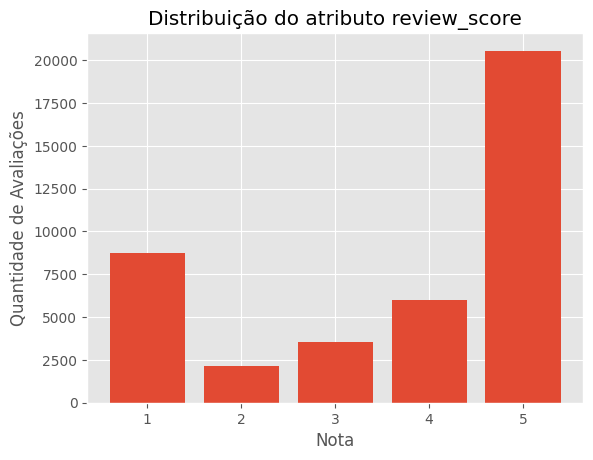

In [15]:
plt.bar(reviews['review_score'].value_counts().sort_index().index, reviews['review_score'].value_counts().sort_index().values)
plt.title('Distribuição do atributo review_score')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Avaliações')
plt.show()

Como observado, há um desequilíbrio entre as avalições positivas (mais frequentes) e avaliações negativas (menos frequentes), o que pode levar ao enviesamento da análise. Sendo assim, para facilitar análise, optou-se pela eliminação das avaliações de nota 3 (consideradas neutras) e dicotomização das restantes entre positivas e negativas.

In [17]:
# Eliminando os registros com notas iguais a 3
reviews = reviews[reviews['review_score'] != 3]

# renomeando as avaliações para categorias dicotômicas de sentimento (negativo e positivo)
def agrupar_scores(score):
    if score in [4, 5]:
        return 'positivo'
    elif score in [1, 2]:
        return 'negativo'

reviews['sentimento'] = reviews['review_score'].apply(agrupar_scores).copy()

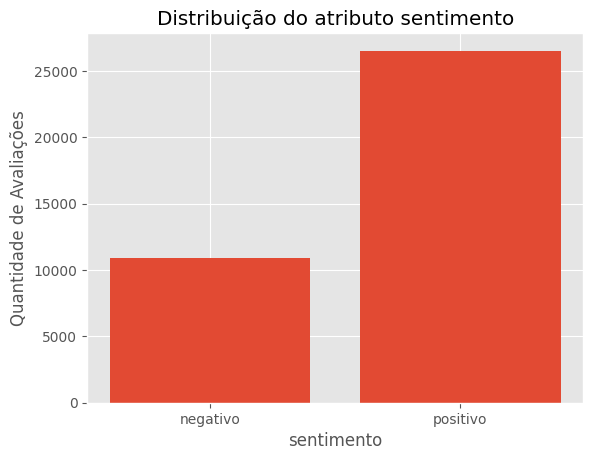

In [18]:
plt.bar(reviews['sentimento'].value_counts().sort_index().index, reviews['sentimento'].value_counts().sort_index().values)
plt.title('Distribuição do atributo sentimento')
plt.xlabel('sentimento')
plt.ylabel('Quantidade de Avaliações')
plt.show()

In [19]:
# geração do dataframe para a próxima etapa
reviews_tratado = reviews[['combined_text', 'sentimento']]

In [20]:
reviews_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37420 entries, 3 to 99223
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   combined_text  37420 non-null  object
 1   sentimento     37420 non-null  object
dtypes: object(2)
memory usage: 877.0+ KB


# Pré-processamento dos Dados

In [57]:
import emoji
import re
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [26]:
# Limpeza

def remover_emoji(texto):
    return emoji.replace_emoji(texto, replace='')

def limpar_texto(texto):
    texto = texto.lower()  # Converter para minúsculas
    texto = remover_emoji(texto) #remover emojis
    texto = re.sub(r'http\S+', '', texto)  # Remover URLs
    texto = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texto)  # Mantém apenas letras acentuadas e espaços
    texto = re.sub(r'\s+', ' ', texto).strip()  # Remove espaços extras
    return texto

reviews_tratado.loc[:,'combined_text'] = reviews_tratado['combined_text'].apply(limpar_texto)

In [ ]:
# etapa de tokenização

def tokenizar_texto(texto):
    return nltk.word_tokenize(texto)

reviews_tratado.loc[:,'tokens'] = reviews_tratado['combined_text'].apply(tokenizar_texto)


In [41]:
# Remoção de Stopwords
# Definição de stopwords em português
stop_words = set(stopwords.words('portuguese'))

def remover_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

reviews_tratado.loc[:,'tokens_sem_stopwords'] = reviews_tratado['tokens'].apply(remover_stopwords)


In [50]:
# Etapa de lematização
lemmatizer = WordNetLemmatizer()

def lematizar_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

reviews_tratado.loc[:,'tokens_lemmatizados'] = reviews_tratado['tokens_sem_stopwords'].apply(lematizar_tokens)

In [61]:
# POS-tagging

def pos_tagging(tokens):
    return nltk.pos_tag(tokens)

reviews_tratado.loc[:,'pos_tags'] = reviews_tratado['tokens_lemmatizados'].apply(pos_tagging)

In [75]:
# Representação vetorial TF-IDF
# Convertendo a lista de tuplas para strings já que o TF-IDF só aceita strings
reviews_tratado.loc[:,'pos_tags_str'] = reviews_tratado['pos_tags'].apply(lambda tags: ' '.join([word for word, tag in tags]))

tfidf_vectorizer = TfidfVectorizer()

# Ajuste e transformação os dados
X_tfidf = tfidf_vectorizer.fit_transform(reviews_tratado['pos_tags_str'])

# Preparação para o modelo

In [77]:
from sklearn.model_selection import train_test_split

# Separação do dataset em features (X) e rótulos (y)
X = X_tfidf
y = reviews_tratado['sentimento']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(X_train.shape, X_test.shape)


(26194, 16468) (11226, 16468)


# Treinamento do modelo

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instanciar o modelo
modelo = RandomForestClassifier(random_state=42)

# Treinar o modelo
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negativo       0.87      0.86      0.86      3299
    positivo       0.94      0.95      0.94      7927

    accuracy                           0.92     11226
   macro avg       0.90      0.90      0.90     11226
weighted avg       0.92      0.92      0.92     11226

